We will start with the first step, i.e. Hypothesis Generation. Hypothesis Generation is the process of listing out all the possible factors that can affect the outcome.

Hypothesis generation is done before having a look at the data in order to avoid any bias that may result after the observation.

1) Hypothesis Generation
Hypothesis generation helps us to point out the factors which might affect our dependent variable. Below are some of the hypotheses which I think can affect the passenger count(dependent variable for this time series problem) on the JetRail:

There will be an increase in the traffic as the years pass by.
Explanation - Population has a general upward trend with time, so I can expect more people to travel by JetRail. Also, generally companies expand their businesses over time leading to more customers travelling through JetRail.
The traffic will be high from May to October.
Explanation - Tourist visits generally increases during this time perion.
Traffic on weekdays will be more as compared to weekends/holidays.
Explanation - People will go to office on weekdays and hence the traffic will be more
Traffic during the peak hours will be high.
Explanation - People will travel to work, college.
We will try to validate each of these hypothesis based on the dataset. Now let’s have a look at the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import mean_squared_error

In [2]:
train_data = pd.read_csv('Train.csv')

In [3]:
test_data = pd.read_csv('Test.csv')
test_data.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [4]:
test_data.tail()

,ID,Datetime
5107,23395,26-04-2015 19:00
5108,23396,26-04-2015 20:00
5109,23397,26-04-2015 21:00
5110,23398,26-04-2015 22:00
5111,23399,26-04-2015 23:00


In [5]:
#data.drop(['ID'], inplace=True, axis =1)

In [6]:
train_data.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [7]:
train_data.tail()

,ID,Datetime,Count
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580
18287,18287,25-09-2014 23:00,534


In [8]:
plt.figure(figsize = (20,8))

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

In [9]:
train_data.shape

(18288, 3)

In [10]:
test_data.shape

(5112, 2)

In [11]:
train_data.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [12]:
train_data.Datetime = pd.to_datetime(train_data.Datetime, format='%d-%m-%Y %H:%M')

In [13]:
train_data.dtypes

ID                   int64
Datetime    datetime64[ns]
Count                int64
dtype: object

In [14]:
train_data.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [15]:
train_data['day_of_week'] = train_data.Datetime.dt.dayofweek

In [16]:
train_data.head()

,ID,Datetime,Count,day_of_week
0,0,2012-08-25 00:00:00,8,5
1,1,2012-08-25 01:00:00,2,5
2,2,2012-08-25 02:00:00,6,5
3,3,2012-08-25 03:00:00,2,5
4,4,2012-08-25 04:00:00,2,5


In [17]:
def weekend(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

In [18]:
temp = train_data.Datetime.apply(weekend)

In [19]:
train_data['weekend'] = temp

In [20]:
train_data.head()

,ID,Datetime,Count,day_of_week,weekend
0,0,2012-08-25 00:00:00,8,5,1
1,1,2012-08-25 01:00:00,2,5,1
2,2,2012-08-25 02:00:00,6,5,1
3,3,2012-08-25 03:00:00,2,5,1
4,4,2012-08-25 04:00:00,2,5,1


In [21]:
train_data.index = train_data.Datetime

In [22]:
train_data.head()

,ID,Datetime,Count,day_of_week,weekend
Datetime,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,5,1


In [23]:
train_data.drop(['ID'], axis =1, inplace=True)

In [24]:
train_data.head()

,Datetime,Count,day_of_week,weekend
Datetime,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,5,1


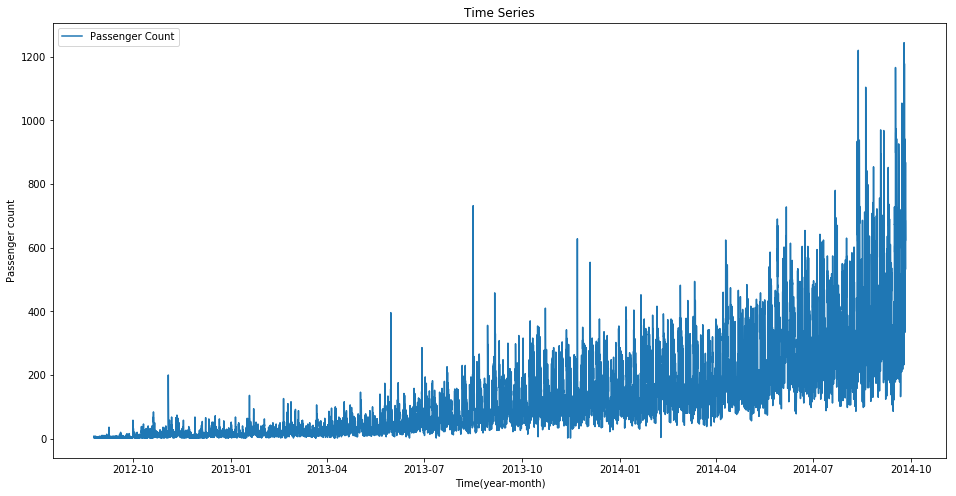

In [25]:
ts = train_data['Count'] 
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Passenger Count') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')

In [26]:
train_data['year'] = train_data.Datetime.dt.year
train_data['month'] = train_data.Datetime.dt.month
train_data['day'] = train_data.Datetime.dt.day
train_data['hour'] = train_data.Datetime.dt.hour

In [27]:
train_data.head()

,Datetime,Count,day_of_week,weekend,year,month,day,hour
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,5,1,2012,8,25,0
2012-08-25 01:00:00,2012-08-25 01:00:00,2,5,1,2012,8,25,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,5,1,2012,8,25,2
2012-08-25 03:00:00,2012-08-25 03:00:00,2,5,1,2012,8,25,3
2012-08-25 04:00:00,2012-08-25 04:00:00,2,5,1,2012,8,25,4


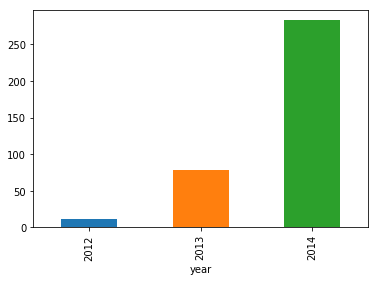

In [28]:
train_data.groupby('year')['Count'].mean().plot.bar()

In [29]:
train_data.groupby('year').mean()['Count']

year
2012     11.282946
2013     78.306849
2014    283.017102
Name: Count, dtype: float64

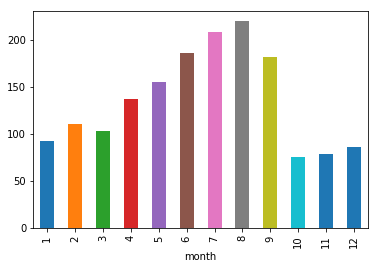

In [30]:
train_data.groupby('month').mean()['Count'].plot.bar()

Here we see a decrease in the mean of passenger count in last three months. This does not look right. Let’s look at the monthly mean of each year separately.

In [31]:
temp = train_data.groupby(['year','month'])['Count'].mean()

In [32]:
temp

year  month
2012  8          2.952381
      9          4.444444
      10        10.986559
      11        15.827778
      12        15.680108
2013  1         18.430108
      2         22.190476
      3         23.588710
      4         34.405556
      5         45.612903
      6         57.333333
      7         74.787634
      8        100.137097
      9        120.744444
      10       139.932796
      11       141.000000
      12       157.387097
2014  1        167.204301
      2        200.202381
      3        183.994624
      4        240.955556
      5        264.497312
      6        316.113889
      7        343.354839
      8        389.981183
      9        468.433333
Name: Count, dtype: float64

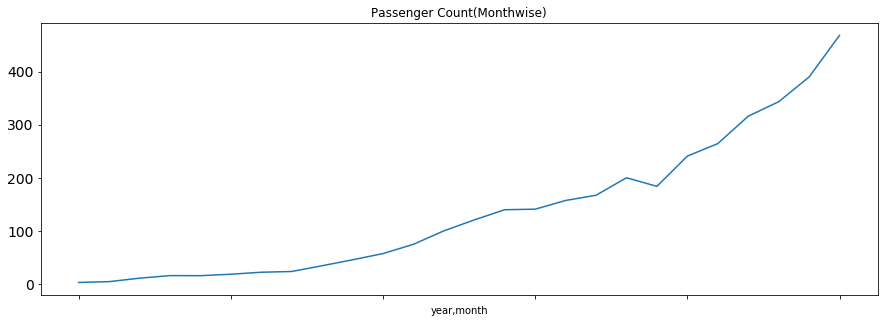

In [33]:
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

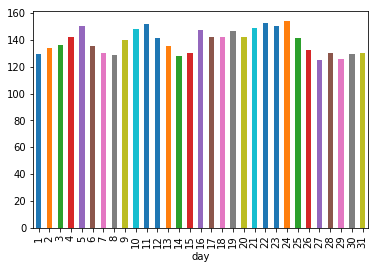

In [34]:
train_data.groupby('day')['Count'].mean().plot.bar()

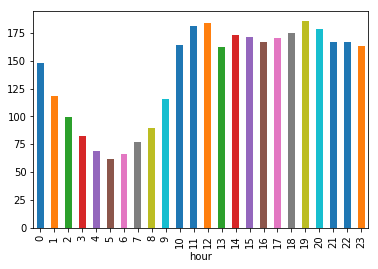

In [35]:
train_data.groupby('hour')['Count'].mean().plot.bar()

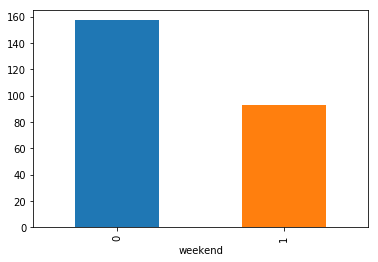

In [36]:
train_data.groupby('weekend')['Count'].mean().plot.bar()

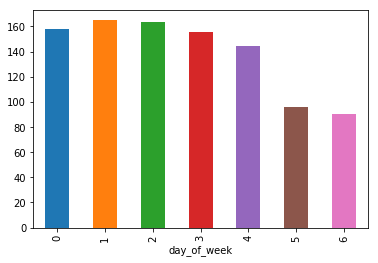

In [37]:
train_data.groupby('day_of_week')['Count'].mean().plot.bar()

In [38]:
train_data.head()

,Datetime,Count,day_of_week,weekend,year,month,day,hour
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,5,1,2012,8,25,0
2012-08-25 01:00:00,2012-08-25 01:00:00,2,5,1,2012,8,25,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,5,1,2012,8,25,2
2012-08-25 03:00:00,2012-08-25 03:00:00,2,5,1,2012,8,25,3
2012-08-25 04:00:00,2012-08-25 04:00:00,2,5,1,2012,8,25,4


As we have seen that there is a lot of noise in the hourly time series, we will aggregate the hourly time series to daily, weekly, and monthly time series to reduce the noise and make it more stable and hence would be easier for a model to learn.

In [39]:
train_data.Timestamp = pd.to_datetime(train_data.Datetime ,format='%d-%m-%Y %H:%M')

/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [40]:
hourly = train_data.resample('H').mean()

In [41]:
hourly.head()

,Count,day_of_week,weekend,year,month,day,hour
Datetime,,,,,,,
2012-08-25 00:00:00,8,5,1,2012,8,25,0
2012-08-25 01:00:00,2,5,1,2012,8,25,1
2012-08-25 02:00:00,6,5,1,2012,8,25,2
2012-08-25 03:00:00,2,5,1,2012,8,25,3
2012-08-25 04:00:00,2,5,1,2012,8,25,4


In [42]:
# Converting to daily mean 
daily = train_data.resample('D').mean()

In [43]:
daily.head()

,Count,day_of_week,weekend,year,month,day,hour
Datetime,,,,,,,
2012-08-25,3.166667,5.0,1.0,2012.0,8.0,25.0,11.5
2012-08-26,3.666667,6.0,1.0,2012.0,8.0,26.0,11.5
2012-08-27,2.583333,0.0,0.0,2012.0,8.0,27.0,11.5
2012-08-28,2.416667,1.0,0.0,2012.0,8.0,28.0,11.5
2012-08-29,2.500000,2.0,0.0,2012.0,8.0,29.0,11.5


In [44]:
# Converting to weekly mean 
weekly = train_data.resample('W').mean() 
# Converting to monthly mean 
monthly = train_data.resample('M').mean()

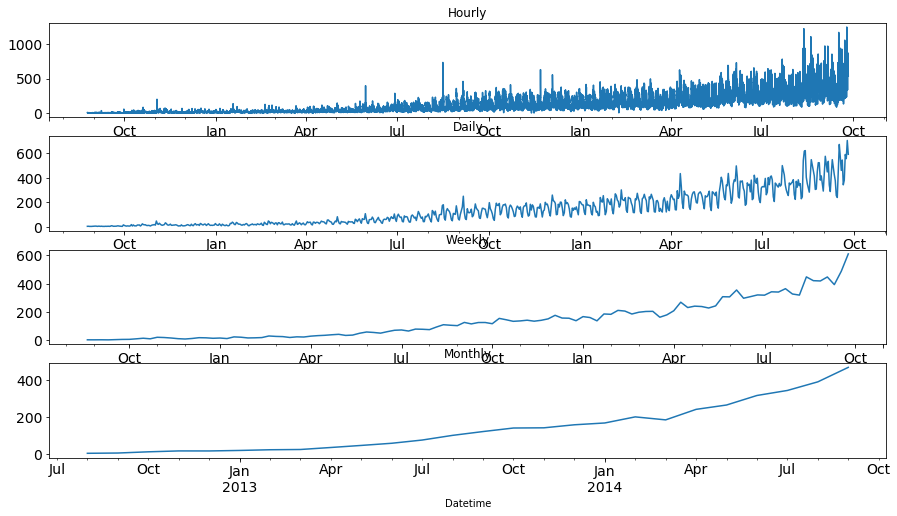

In [45]:
#Let’s look at the hourly, daily, weekly and monthly time series.

fig, axs = plt.subplots(4,1) 
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0]) 
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1]) 
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2]) 
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3]) 


We can see that the time series is becoming more and more stable when we are aggregating it on daily, weekly and monthly basis.

But it would be difficult to convert the monthly and weekly predictions to hourly predictions, as first we have to convert the monthly predictions to weekly, weekly to daily and daily to hourly predictions, which will become very expanded process. So, we will work on the daily time series.

To divide the data into training and validation set, we will take last 3 months as the validation data and rest for training data. We will take only 3 months as the trend will be the most in them. If we take more than 3 months for the validation set, our training set will have less data points as the total duration is of 25 months. So, it will be a good choice to take 3 months for validation set.

The starting date of the dataset is 25-08-2012 as we have seen in the exploration part and the end date is 25-09-2014.

In [46]:
train=daily.loc['2012-08-25':'2014-06-24'] 
valid=daily.loc['2014-06-25':'2014-09-25']

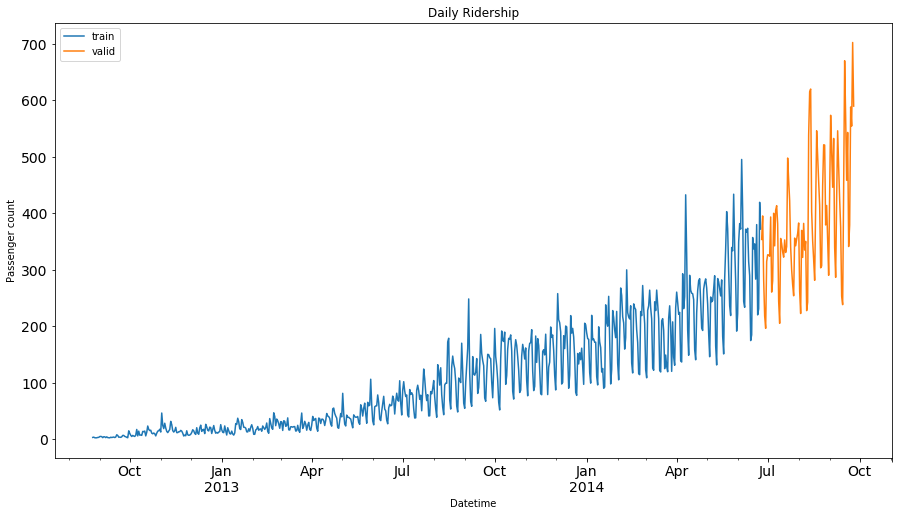

In [47]:
train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train') 
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid') 
plt.xlabel("Datetime") 
plt.ylabel("Passenger count") 
plt.legend(loc='best') 
plt.show()

First of all let us visualize the trend, seasonality and error in the series.

We can decompose the time series in four parts.

Observed, which is the original time series.
Trend, which shows the trend in the time series, i.e., increasing or decreasing behaviour of the time series.
Seasonal, which tells us about the seasonality in the time series.
Residual, which is obtained by removing any trend or seasonality in the time series.

In [48]:
import statsmodels.api as sm

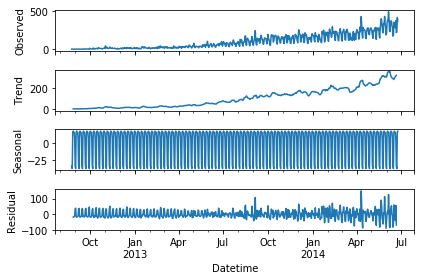

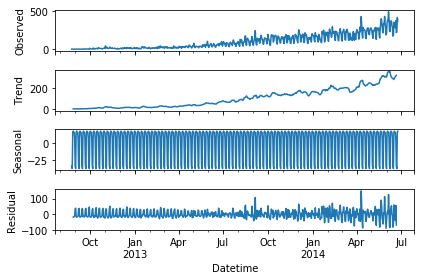

In [49]:
sm.tsa.seasonal_decompose(train.Count).plot()

ARIMA stands for Auto Regression Integrated Moving Average. It is specified by three ordered parameters (p,d,q).

Here p is the order of the autoregressive model(number of time lags)
d is the degree of differencing(number of times the data have had past values subtracted)
q is the order of moving average model

What is a stationary time series?
There are three basic criterion for a series to be classified as stationary series :

The mean of the time series should not be a function of time. It should be constant.
The variance of the time series should not be a function of time.
THe covariance of the ith term and the (i+m)th term should not be a function of time.
Why do we have to make the time series stationary?
We make the series stationary to make the variables independent. Variables can be dependent in various ways, but can only be independent in one way. So, we will get more information when they are independent. Hence the time series must be stationary.

If the time series is not stationary, firstly we have to make it stationary. For doing so, we need to remove the trend and seasonality from the data.

# SARIMAX

In [50]:
y_hat = valid.copy()

In [51]:
fit1 = sm.tsa.statespace.SARIMAX(train.Count, order = (2,1,4), seasonal_order=(0,1,1,7)).fit()

/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Order in the above model represents the order of the autoregressive model(number of time lags), the degree of differencing(number of times the data have had past values subtracted) and the order of moving average model.

Seasonal order represents the order of the seasonal component of the model for the AR parameters, differences, MA parameters, and periodicity.

In our case the periodicity is 7 since it is daily time series and will repeat after every 7 days.

In [52]:
y_hat['sarima'] = fit1.predict(start='2014-6-25',end='2014-9-25', dynamic=True)

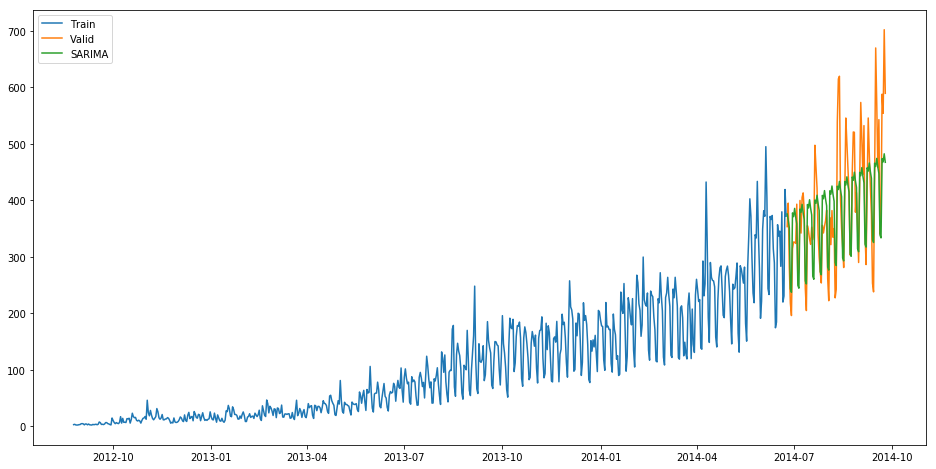

In [53]:
plt.figure(figsize=(16,8)) 
plt.plot( train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat['sarima'], label='SARIMA') 
plt.legend(loc='best') 
plt.show()

In [54]:
rms = np.sqrt(mean_squared_error(valid.Count, y_hat.sarima)) 
print(rms)

69.61438022337671


In [55]:
predict=fit1.predict(start="2014-9-26", end="2015-4-26", dynamic=True)

/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/kalman_filter.py:1740: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


Note that these are the daily predictions and we need hourly predictions. So, we will distribute this daily prediction into hourly counts. To do so, we will take the ratio of hourly distribution of passenger count from train data and then we will distribute the predictions in the same ratio.

In [56]:
#test['prediction']=predict

In [57]:
from statsmodels.tsa.stattools import adfuller

In [60]:
def test_stationarity(timeseries):
    
    print('results of dickey fuller test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value
        
    print(dfoutput)
    

In [61]:
test_stationarity(train_data['Count'])

results of dickey fuller test:
Test Statistic                    -4.456561
p-value                            0.000235
Lags Used                         45.000000
Number of Observations Used    18242.000000
Critical value (1%)               -3.430709
Critical value (5%)               -2.861698
Critical value (10%)              -2.566854
dtype: float64


The statistics shows that the time series is stationary as Test Statistic < Critical value but we can see an increasing trend in the data. So, firstly we will try to make the data more stationary. For doing so, we need to remove the trend and seasonality from the data.

# Removing Trend


A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear.

We see an increasing trend in the data so we can apply transformation which penalizes higher values more than smaller ones, for example log transformation.

We will take rolling average here to remove the trend. We will take the window size of 24 based on the fact that each day has 24 hours.